# Tutorial 0: Basic examples

In [1]:
import warnings
import sys
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins
import synthcity.logger as log

log.add(sink=sys.stderr, level="INFO")

X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


## List the available generative models

In [2]:
from synthcity.plugins import Plugins

Plugins().list()

['random_noise', 'dummy_sampler']

## Load and train a generative model

In [3]:
from synthcity.plugins import Plugins

syn_model = Plugins().get("dummy_sampler")

syn_model.fit(X)

## Generate new data using the model

In [4]:
syn_model.generate(count = 10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.005515,-0.044642,0.064930,0.035644,-0.001569,0.014970,-0.013948,0.000729,-0.018118,0.032059,109.0
1,-0.023677,-0.044642,0.040140,-0.012556,-0.009825,-0.001001,-0.002903,-0.002592,-0.011901,-0.038357,147.0
2,0.012648,0.050680,0.002417,0.056301,0.027326,0.017162,0.041277,-0.039493,0.003712,0.073480,85.0
3,-0.027310,0.050680,-0.007284,-0.040099,-0.011201,-0.013840,0.059685,-0.039493,-0.082381,-0.025930,52.0
4,-0.078165,-0.044642,-0.016984,-0.012556,-0.000193,-0.013527,0.070730,-0.039493,-0.041180,-0.092204,90.0
5,-0.020045,-0.044642,0.018584,0.090730,0.003935,0.008707,0.037595,-0.039493,-0.057800,0.007207,113.0
6,0.001751,-0.044642,-0.070875,-0.022885,-0.001569,-0.001001,0.026550,-0.039493,-0.022512,0.007207,49.0
7,-0.056370,-0.044642,-0.080575,-0.084857,-0.037344,-0.037013,0.033914,-0.039493,-0.056158,-0.137767,72.0
8,0.027178,0.050680,-0.035307,0.032201,-0.011201,0.001504,-0.010266,-0.002592,-0.014956,-0.050783,53.0
9,0.009016,-0.044642,0.045529,0.028758,0.012191,-0.013840,0.026550,-0.039493,0.046132,0.036201,202.0


## Generate new data under some constraints

In [5]:
# Constraint: target <= 100
from synthcity.plugins.core.constraints import Constraints

constraints = Constraints(rules = [("target", "<=", 100)])

generated = syn_model.generate(count = 10, constraints = constraints)

assert (generated["target"] <= 100).any()

generated

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.005515,0.050680,0.001339,-0.084857,-0.011201,-0.016658,0.048640,-0.039493,-0.041180,-0.088062,51.0
1,-0.027310,-0.044642,-0.066563,-0.112400,-0.049727,-0.041397,0.000779,-0.039493,-0.035817,-0.009362,77.0
2,-0.016412,-0.044642,-0.035307,-0.026328,0.032830,0.017162,0.100183,-0.039493,-0.070209,-0.079778,52.0
3,-0.001882,0.050680,-0.033151,-0.018294,0.031454,0.042840,-0.013948,0.019917,0.010226,0.027917,84.0
4,-0.023677,-0.044642,0.059541,-0.040099,-0.042848,-0.043589,0.011824,-0.039493,-0.015998,0.040343,85.0
5,-0.020045,-0.044642,-0.054707,-0.053871,-0.066239,-0.057367,0.011824,-0.039493,-0.074089,-0.005220,42.0
6,-0.041840,-0.044642,0.041218,-0.026328,-0.031840,-0.030437,-0.036038,0.002943,0.033657,-0.017646,52.0
7,0.001751,0.050680,-0.057941,-0.043542,-0.096510,-0.047034,-0.098625,0.034309,-0.061177,-0.071494,88.0
8,-0.005515,0.050680,-0.033151,-0.015999,0.008063,0.016222,0.015505,-0.002592,-0.028320,-0.075636,54.0
9,-0.052738,0.050680,-0.040696,-0.067642,-0.031840,-0.037013,0.037595,-0.039493,-0.034524,0.069338,42.0


In [6]:
# Constraint: target > 150

from synthcity.plugins.core.constraints import Constraints

constraints = Constraints(rules = [("target", ">", 150)])

generated = syn_model.generate(count = 10, constraints = constraints)

assert (generated["target"] > 150).any()

generated

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.048974,0.050680,0.081097,0.021872,0.043837,0.064134,-0.054446,0.071210,0.032433,0.048628,180.0
1,0.023546,0.050680,-0.019140,0.049415,-0.063487,-0.061125,0.004460,-0.039493,-0.025952,-0.013504,219.0
2,-0.027310,-0.044642,-0.018062,-0.040099,-0.002945,-0.011335,0.037595,-0.039493,-0.008944,-0.054925,168.0
3,0.034443,-0.044642,0.018584,0.056301,0.012191,-0.054549,-0.069172,0.071210,0.130081,0.007207,273.0
4,0.041708,0.050680,0.012117,0.039087,0.054845,0.044406,0.004460,-0.002592,0.045601,-0.001078,235.0
5,-0.030942,0.050680,0.028284,0.070073,-0.126781,-0.106845,-0.054446,-0.047981,-0.030751,0.015491,170.0
6,-0.030942,0.050680,0.059541,0.001215,0.012191,0.031567,-0.043401,0.034309,0.014823,0.007207,178.0
7,-0.005515,0.050680,-0.008362,-0.002228,-0.033216,-0.063630,-0.036038,-0.002592,0.080585,0.007207,161.0
8,-0.060003,0.050680,0.049840,0.018429,-0.016704,-0.030124,-0.017629,-0.002592,0.049769,-0.059067,221.0
9,0.045341,0.050680,0.060618,0.031053,0.028702,-0.047347,-0.054446,0.071210,0.133599,0.135612,245.0


## Plot real-synthetic distributions

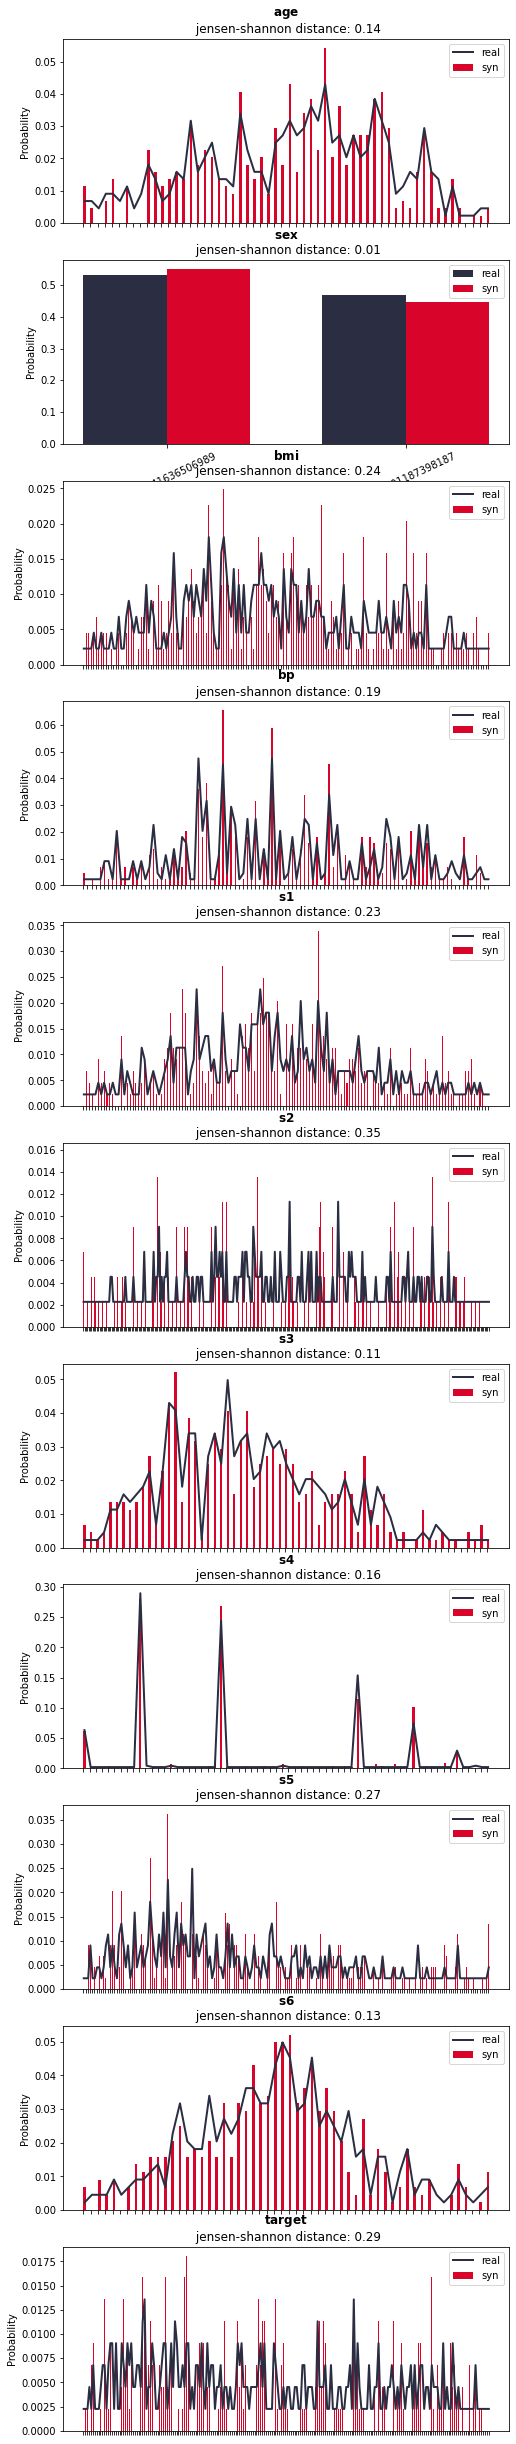

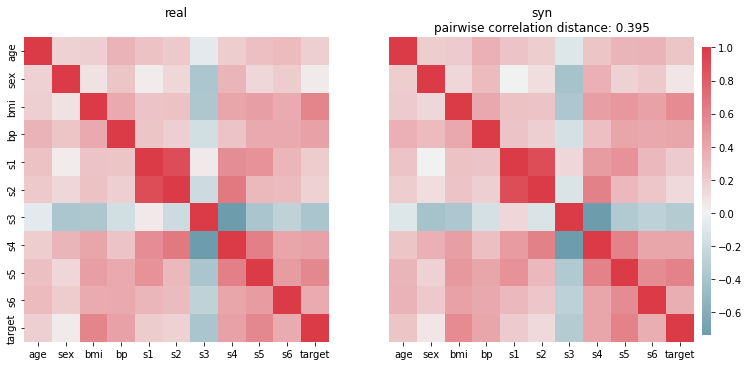

In [7]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

## Benchmark the quality of plugins

In [8]:
from synthcity.benchmark import Benchmarks
constraints = Constraints(rules = [("target", "ge", 150)])

score = Benchmarks.evaluate(
    ["dummy_sampler", "random_noise"],
    X,
    sensitive_columns = ["sex"],
    synthetic_size = 1000,
    synthetic_constraints = constraints,
    repeats = 5,
)


[2022-03-24T00:13:18.158937+0000][920469][INFO] Benchmarking plugin : dummy_sampler
[2022-03-24T00:13:18.160162+0000][920469][INFO]  Experiment repeat: 0
[2022-03-24T00:13:52.798058+0000][920469][INFO]  Experiment repeat: 1
[2022-03-24T00:14:18.313365+0000][920469][INFO]  Experiment repeat: 2
[2022-03-24T00:14:44.403767+0000][920469][INFO]  Experiment repeat: 3
[2022-03-24T00:15:09.709097+0000][920469][INFO]  Experiment repeat: 4
[2022-03-24T00:15:34.755075+0000][920469][INFO] Benchmarking plugin : random_noise
[2022-03-24T00:15:34.755868+0000][920469][INFO]  Experiment repeat: 0
[2022-03-24T00:16:03.833313+0000][920469][INFO]  Experiment repeat: 1
[2022-03-24T00:16:32.406111+0000][920469][INFO]  Experiment repeat: 2
[2022-03-24T00:16:58.198846+0000][920469][INFO]  Experiment repeat: 3
[2022-03-24T00:17:20.165523+0000][920469][INFO]  Experiment repeat: 4


In [9]:
Benchmarks.print(score)


Plugin : dummy_sampler


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,5,0,0.0
sanity.common_rows_proportion,0.457014,0.461538,0.459729,0.002217,0.461538,0.004525,5,0,0.01
sanity.avg_distance_nearest_neighbor,0.253648,0.253724,0.253665,0.00003,0.253648,0.000007,5,0,0.01
sanity.inlier_probability,0.565611,0.565611,0.565611,0.0,0.565611,0.0,5,0,0.01
sanity.outlier_probability,0.047511,0.047511,0.047511,0.0,0.047511,0.0,5,0,0.01
statistical.inverse_kl_divergence,0.78641,0.790164,0.788301,0.001218,0.788291,0.000852,5,0,0.02
statistical.kolmogorov_smirnov_test,0.807233,0.815963,0.813486,0.003219,0.814301,0.001758,5,0,0.03
statistical.chi_squared_test,0.359188,0.363102,0.360811,0.001565,0.360492,0.002897,5,0,0.03
statistical.maximum_mean_discrepancy,0.010561,0.011426,0.010895,0.00029,0.010785,0.000146,5,0,0.08
statistical.inverse_cdf_distance,2.255037,2.330334,2.2854,0.024689,2.279196,0.008149,5,0,6.81




Plugin : random_noise


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,5,0,0.0
sanity.common_rows_proportion,0.0,0.0,0.0,0.0,0.0,0.0,5,0,0.02
sanity.avg_distance_nearest_neighbor,0.603946,0.603946,0.603946,0.0,0.603946,0.0,5,0,0.02
sanity.inlier_probability,0.052036,0.052036,0.052036,0.0,0.052036,0.0,5,0,0.01
sanity.outlier_probability,0.266968,0.266968,0.266968,0.0,0.266968,0.0,5,0,0.02
statistical.inverse_kl_divergence,0.055061,0.055061,0.055061,0.0,0.055061,0.0,5,0,0.02
statistical.kolmogorov_smirnov_test,0.409297,0.409297,0.409297,0.0,0.409297,0.0,5,0,0.06
statistical.chi_squared_test,0.0,0.0,0.0,0.0,0.0,0.0,5,0,0.03
statistical.maximum_mean_discrepancy,0.009774,0.009774,0.009774,0.0,0.009774,0.0,5,0,0.09
statistical.inverse_cdf_distance,0.328825,0.333566,0.330679,0.002025,0.329173,0.003562,5,0,1.14


# 